# Бэггинг и слуайный лес

## 1. Загрузка исходных данных

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

Взглянем на данные

In [5]:
digits.data.view()

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

Выберем признаки из набора данных digits

In [6]:
X = digits.data

Выберем вектор ответов.

In [7]:
y = digits.target

In [10]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [11]:
from sklearn.cross_validation import cross_val_score

Создадим DesicionTree классификатор с параметрами по умолчанию и измеримкачество его работы на кросс-валидации с 10-тью фолдами.

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

Вспомогательная функция для записи ответа на вопросы:

In [38]:
def write_answer(ans, ans_n):
    with open("trees_answer"+str(ans_n)+".txt", "w") as fout:
        fout.write(str(ans))

In [23]:
dtc_score = cross_val_score(dtc, X, y, cv = 10)
print('Значения метрики качества : ', dtc_score)
result_1 = dtc_score.mean()
print('Среднее значение метрики качества: ', result_1)

Значения метрики качества :  [ 0.8         0.86885246  0.82872928  0.80555556  0.82122905  0.87150838
  0.91061453  0.83707865  0.77966102  0.80681818]
Среднее значение метрики качества:  0.83300471021


In [39]:
write_answer(result_1, 1)

Теперь используем BaggingClassifier со стандартным набором параметров для выращивания ста деревьев.

In [45]:
from sklearn.ensemble import BaggingClassifier
bagging_dtc = BaggingClassifier(dtc, 100)

Получим оценку качества получившейся композиции

In [47]:
bagging_dtc_score = cross_val_score(bagging_dtc, X, y, cv = 10)
print('Значения метрики качества : ', bagging_dtc_score)
result_2 = bagging_dtc_score.mean()
print('Среднее значение метрики качества: ', result_2)

Значения метрики качества :  [ 0.88648649  0.94535519  0.92265193  0.93333333  0.9273743   0.98324022
  0.97206704  0.91011236  0.8700565   0.93181818]
Среднее значение метрики качества:  0.928249554757


In [49]:
write_answer(result_2, 2)

Далее изучим работу BaggingClassifier с применением эвристики для количества признаков для обучения. Будем обучать деревья на $\sqrt{d}$ случайных признаках набора данных

In [66]:
import numpy as np
f_num = int(np.sqrt(X.shape[1])) # количество признаков для обучения

In [68]:
bagging_dtc_sqrt = BaggingClassifier(dtc, 100, max_features = f_num)
bagging_dtc_sqrt_score = cross_val_score(bagging_dtc_sqrt, X, y, cv = 10)
print('Значения метрики качества : ', bagging_dtc_sqrt_score)
result_3 = bagging_dtc_sqrt_score.mean()
print('Среднее значение метрики качества: ', result_3)

Значения метрики качества :  [ 0.89189189  0.96174863  0.95027624  0.92222222  0.93854749  0.9273743
  0.94413408  0.96629213  0.88700565  0.89772727]
Среднее значение метрики качества:  0.928721991429


In [69]:
write_answer(result_3, 3)

Устанавливая параметр max_features при создании BaggingClassifier, мы используем $\sqrt{d}$ случайных признаков датасета для всех деревьев. Теперь попробуем делать тоже самое, но для каждого дерева в отдельности.

In [72]:
dtc_rnd_features = DecisionTreeClassifier(max_features = f_num)
bagging_dtc_rnd_features = BaggingClassifier(dtc_rnd_features, 100)
bagging_dtc_rnd_features_score = cross_val_score(bagging_dtc_rnd_features, X, y, cv = 10)
print('Значения метрики качества : ', bagging_dtc_rnd_features_score)
result_4 = bagging_dtc_rnd_features_score.mean()
print('Среднее значение метрики качества: ', result_4)

Значения метрики качества :  [ 0.91351351  0.9726776   0.95027624  0.96666667  0.96089385  0.97206704
  0.97765363  0.97191011  0.93785311  0.94318182]
Среднее значение метрики качества:  0.956669358193


In [73]:
write_answer(result_4, 4)

Получившийся в последнем случае алгоритм эквивалентен алгоритму слчайного леса. Изучим его на практике и построим графики зависимости качества модели от количества деревьев, количества случайных признаков для обучения деревьев и для максимальной глубины деревьев.

In [75]:
from sklearn.ensemble import RandomForestClassifier

Сначала сравним качество случайного леса с $\sqrt{d}$ случайными признаками

In [78]:
rnd_forest_clf = RandomForestClassifier(max_features = f_num)
rnd_forest_clf_score = cross_val_score(rnd_forest_clf, X, y, cv = 10)
print('Значения метрики качества : ', rnd_forest_clf_score)
result_5 = rnd_forest_clf_score.mean()
print('Среднее значение метрики качества: ', result_5)

Значения метрики качества :  [ 0.91891892  0.93442623  0.90055249  0.9         0.93854749  0.94413408
  0.94972067  0.95505618  0.88700565  0.89772727]
Среднее значение метрики качества:  0.922608897147


In [108]:
max_depth_score = list()
for max_depth in range(1, 10):
    rnd_forest_clf = RandomForestClassifier(max_depth = max_depth)
    rnd_forest_clf_score = cross_val_score(rnd_forest_clf, X, y, cv = 10)
    mean_score = rnd_forest_clf_score.mean()
    max_depth_score.append(mean_score)

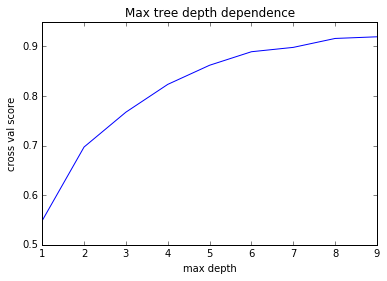

In [111]:
import matplotlib.pylab as plt
%matplotlib inline
xx = range(1, 10)
plt.plot(xx, max_depth_score)
plt.title('Max tree depth dependence')
plt.xlabel('max depth')
plt.ylabel('cross val score')
plt.show()

In [127]:
max_features_score = list()
for max_features in range(1, 50):
    rnd_forest_clf = RandomForestClassifier(max_features = max_features)
    rnd_forest_clf_score = cross_val_score(rnd_forest_clf, X, y, cv = 10)
    mean_score = rnd_forest_clf_score.mean()
    max_features_score.append(mean_score)

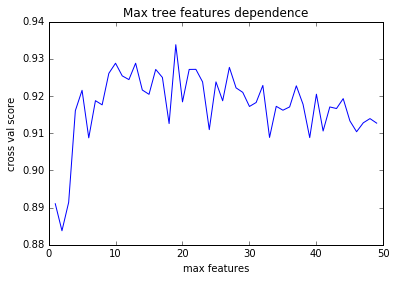

In [128]:
xx = range(1, 50)
plot(xx, max_features_score)
plt.title('Max tree features dependence')
plt.xlabel('max features')
plt.ylabel('cross val score')
plt.show()

In [125]:
xx = range(5, 100, 5)
max_trees_score = list()
for max_trees in xx:
    rnd_forest_clf = RandomForestClassifier(n_estimators = max_trees)
    rnd_forest_clf_score = cross_val_score(rnd_forest_clf, X, y, cv = 10)
    mean_score = rnd_forest_clf_score.mean()
    max_trees_score.append(mean_score)

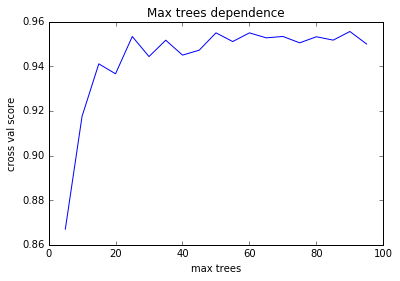

In [126]:
plot(xx, max_trees_score)
plt.title('Max trees dependence')
plt.xlabel('max trees')
plt.ylabel('cross val score')
plt.show()